In [239]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [240]:
dataset = pd.read_csv("Wine.csv")
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [241]:
x = dataset.iloc[:, 0:13].values
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [242]:
y = dataset.iloc[:, 13].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [243]:
#Membagi training set dan test set
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

In [244]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

In [245]:
#Menjalankan algoritma PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None) #None karena untuk mengecek varian pada masing2 variabel
xTrain = pca.fit_transform(xTrain)
xTest = pca.transform(xTest)
hasilVarian = pca.explained_variance_ratio_ #pengecekan varian
hasilVarian

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

In [246]:
#Pemilihan PC
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.fit_transform(xTest)
pca = PCA(n_components=2) #Dipilih 2 varian terbanyak 
xTrain = pca.fit_transform(xTrain)
xTest = pca.transform(xTest)
hasilVarian2 = pca.explained_variance_ratio_
hasilVarian2 #bisa menjelaskan varian/variasi data sebesar 36+19=55% (cukup baik >50%)

array([0.36884109, 0.19318394])

In [247]:
#Menjalankan logistic regression ke training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
#Memprediksi test set berdasarkan model logistic regression
yPred = classifier.predict(xTest)
yPred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [249]:
#Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, yPred)
cm #dalam kasus ini akurasi modelnya 35/36 = 97% (sangat baik) 

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


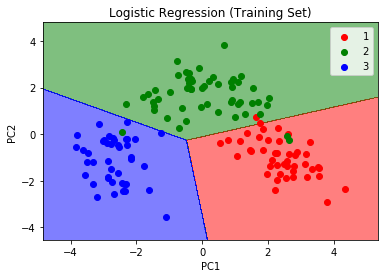

In [250]:
#Visualisasi training set
from matplotlib.colors import ListedColormap
xSet, ySet = xTrain, yTrain
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01)
                    )

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(("red", "green", "blue"))
            )

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1],
                c = ListedColormap(("red", "green", "blue"))(i), label = j
               )
    
plt.title("Logistic Regression (Training Set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


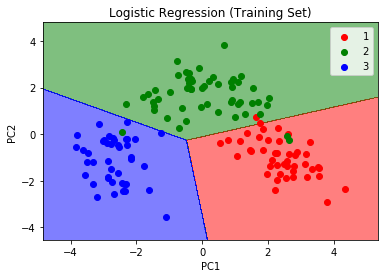

In [252]:
#Visualisasi training set dengan invers scaling
from matplotlib.colors import ListedColormap
xSet, ySet = xTrain, yTrain
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01)
                    )

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(("red", "green", "blue"))
            )

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1],
                c = ListedColormap(("red", "green", "blue"))(i), label = j
               )
    
plt.title("Logistic Regression (Training Set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [ ]:
#Visualisasi test set
from matplotlib.colors import ListedColormap
xSet, ySet = xTest, yTest
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01)
                    )

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(("red", "green", "blue"))
            )

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1],
                c = ListedColormap(("red", "green", "blue"))(i), label = j
               )
    
plt.title("Logistic Regression (Test Set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()